In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

pd.options.display.max_rows = 999
pd.set_option('display.max_columns', 500)

In [2]:
companies = pd.read_csv('cleaned_data_v2.csv', index_col=0)

In [3]:
# add some useful fields for analysis

# profitability
companies['NetProfitMargin'] = (companies['NetProfit'] / companies['NetSales'])
companies['ROE'] = (companies['NetProfit'] / companies['TotalNetWorth'])
companies['ROA'] = (companies['NetProfit'] / companies['TotalAssets'])

# cash conversion cycle
companies['DaysSales'] = (companies['AcctsRecTrade'] * 365.0 / companies['NetSales'])
companies['DaysPay'] = (companies['AcctsPayTrade'] * 365.0 / companies['TotalCOGS'])
companies['DaysInv'] = (companies['TotalInventory'] * 365.0 / companies['TotalCOGS'])
companies['CCC'] = companies['DaysSales'] + companies['DaysInv'] - companies['DaysPay']

# leverage
companies['FixedAssetsToEquity'] = companies['FixedAssets'] / companies['TotalNetWorth']
companies['DebtToEquity'] = companies['LongTermDebt'] / companies['TotalNetWorth']

# efficiency
companies['AssetTurnover'] = companies['NetSales'] / companies['TotalAssets']


In [4]:
[c for c in companies.columns if 'Pay' in c]

['STLoansPayable',
 'AcctsPayTrade',
 'AcctsPayOther',
 'InterestPayable',
 'DividendsPayable',
 'IncTaxesPayable',
 'DefIncTaxPayable',
 'DaysPay']

### Summary by Industry + Year

In [5]:
# breakdown by year
companies['IndustryType'].value_counts()

Manufacturing    690
Construction     224
Name: IndustryType, dtype: int64

In [6]:
companies['Year'].value_counts().sort_index()

1995      1
1996      4
1997      4
1998      2
1999      2
2000     11
2001     11
2002     10
2003     10
2004     15
2005     31
2006     47
2007     94
2008     72
2009     81
2010     63
2011     58
2012     54
2013     32
2014     29
2015     35
2016     36
2017     65
2018    129
2019     18
Name: Year, dtype: int64

### Summary Statistics

In [7]:
# generic function to compare distributions for a variable
def compare_industries(df, field):
    
    na_vals = df[field].isin([np.nan, np.inf, -np.inf])
    print ('Excluding %.0f missing values' % na_vals.sum())
    
    fig, ax = plt.subplots(figsize=(12,7))
    sns.distplot(df[(df['IndustryType']=='Manufacturing') & ~na_vals][field], label='Manufacturing', bins=30)
    sns.distplot(df[(df['IndustryType']=='Construction') & ~na_vals][field], label='Construction', color='r', bins=30)

    ax.legend()
    plt.show()

recent = companies[companies['Year'] >= 2012]
recent.shape

(398, 140)

#### Profitability

Excluding 0 missing values


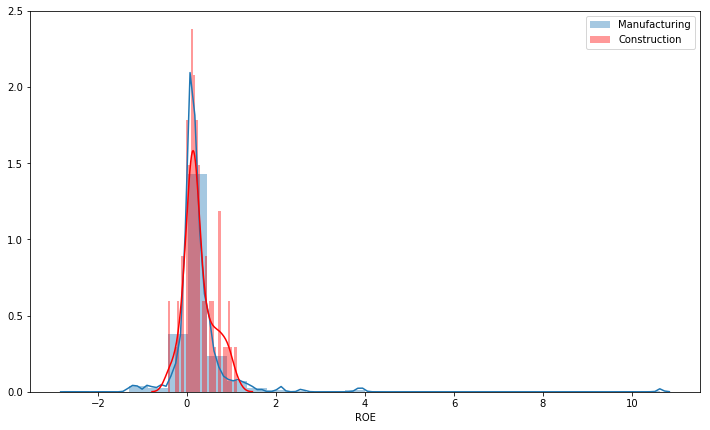

In [8]:
# ROE
compare_industries(recent[recent['ROE'].between(-20.0, 20.0)], 'ROE')

Excluding 0 missing values


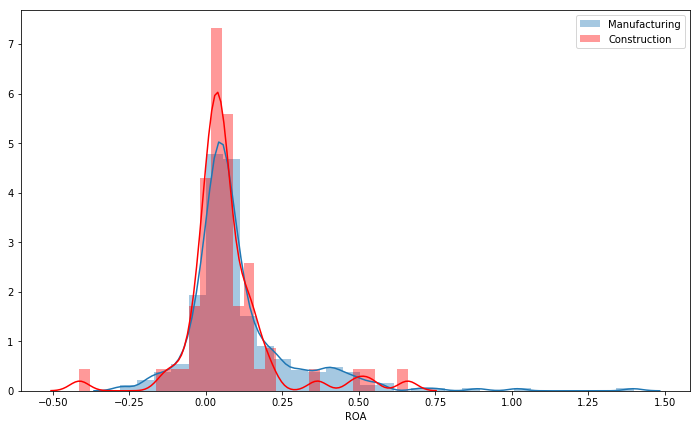

In [9]:
# ROA
compare_industries(recent[recent['ROA'].between(-20.0, 50.0)], 'ROA')

Excluding 1 missing values


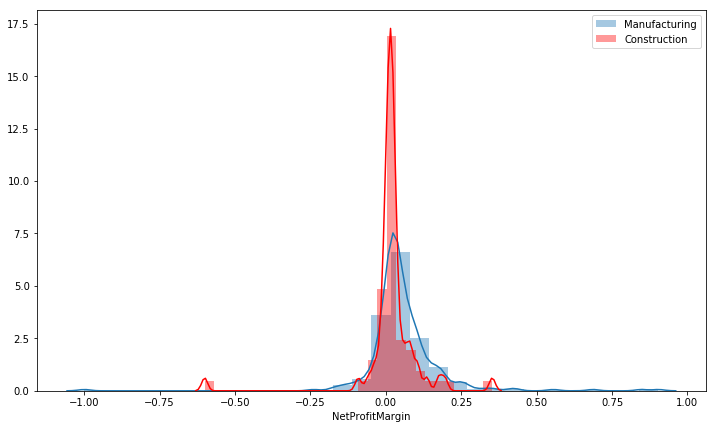

In [10]:
compare_industries(recent, 'NetProfitMargin')

#### Liquidity / Working Capital

Excluding 0 missing values


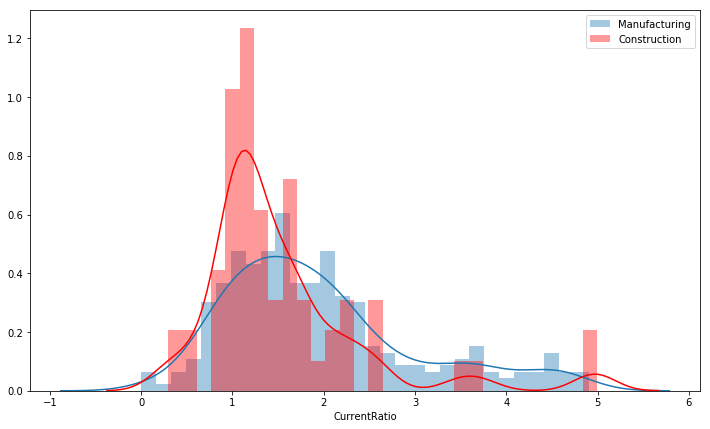

In [11]:
# current ratio
compare_industries(recent[recent['CurrentRatio'].between(-1.0,5.0)], 'CurrentRatio')

Excluding 0 missing values


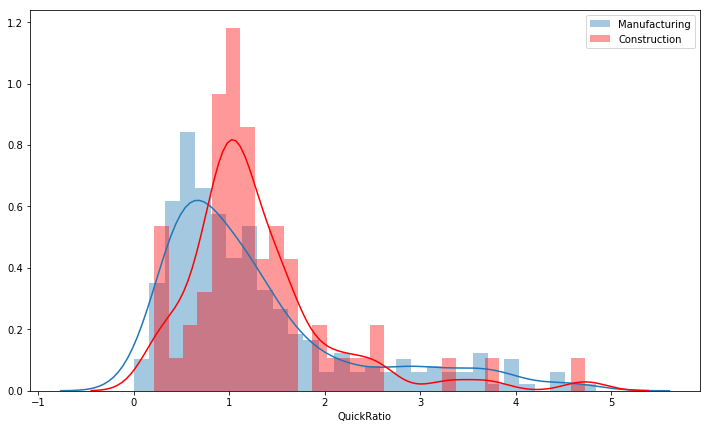

In [12]:
# quick ratio
compare_industries(recent[recent['QuickRatio'].between(0.0, 5.0)], 'QuickRatio')

Excluding 1 missing values


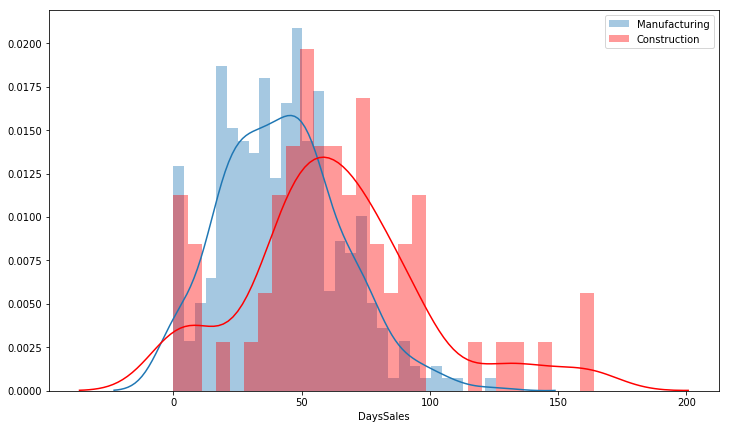

In [13]:
# days of receivables
compare_industries(recent, 'DaysSales')

Excluding 0 missing values


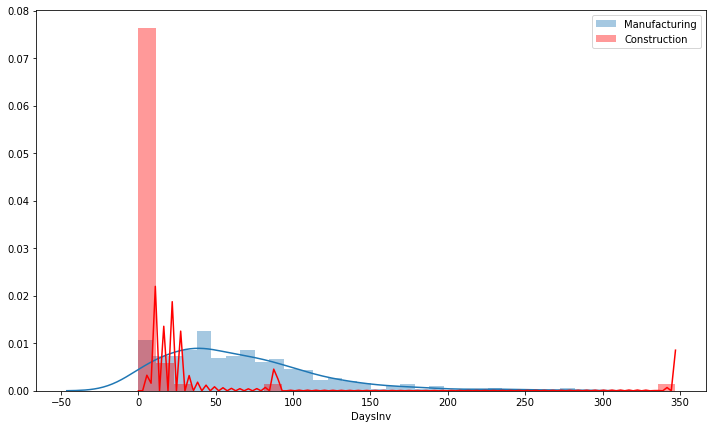

In [14]:
# days of inventory
compare_industries(recent[recent['DaysInv'].between(0.0, 365.0)], 'DaysInv')

Excluding 17 missing values


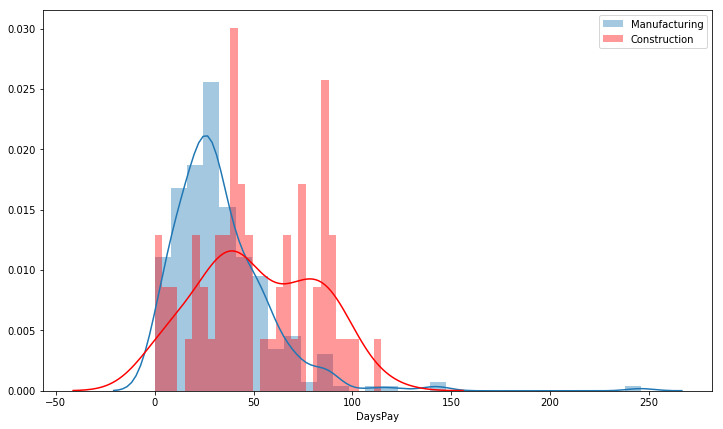

In [15]:
# payables analysis
compare_industries(recent, 'DaysPay')

Excluding 17 missing values


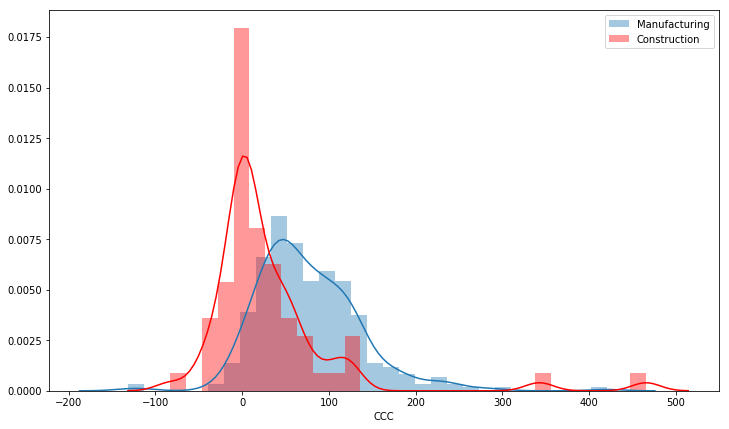

In [16]:
compare_industries(recent, 'CCC')

#### Leverage Ratios

Excluding 0 missing values


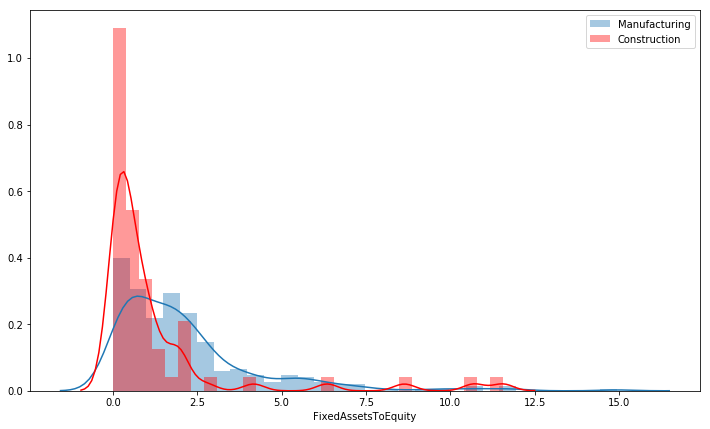

In [17]:
# fixed assets / equity
compare_industries(recent[recent['FixedAssetsToEquity'].between(0.0, 30.0)], 'FixedAssetsToEquity')

Excluding 0 missing values


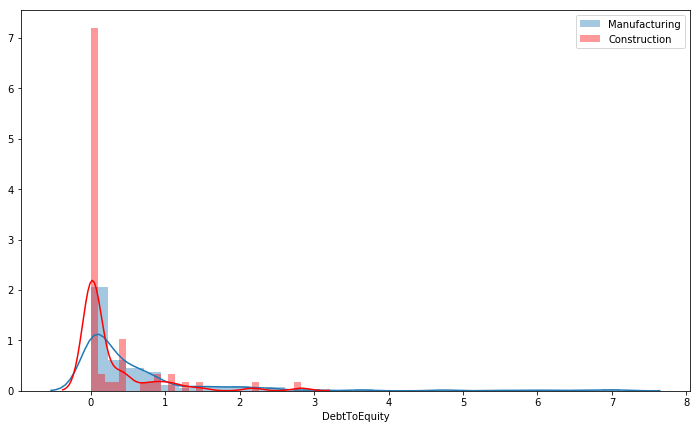

In [18]:
# debt / equity
compare_industries(recent[recent['DebtToEquity'].between(0.0, 15.0)], 'DebtToEquity')

#### Efficiency Ratios

Excluding 0 missing values


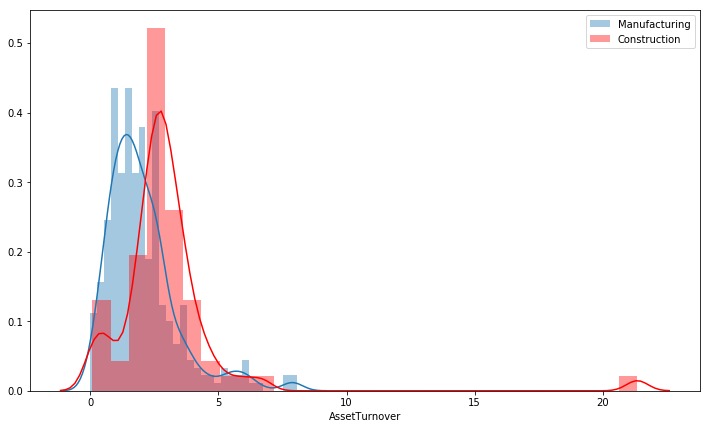

In [19]:
# asset turnover
compare_industries(recent, 'AssetTurnover')